***Visualizing the Contingency Space***

This notebook will go over visualizing our Contingency Space. The first part will go over how to use **CMGenerator** to generate your own plots, while the second will demonstrate the built-in functionality within ContingencySpace.

Some pre-emptive imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
%matplotlib inline

from utils import ConfusionMatrix, CMGenerator, ContingencySpace
from metrics import accuracy, tau

First, we set the granularity. This value determines the number of points along each axis we wish to generate. For instance, with granularity=10, 100 points will be generated, evenly spread across the X and Y axes.

In [2]:
granularity = 30

Next, we initialize the CMGenerator, by passing in two values: the number of classes, and the number of instances that belong to each class (as a dictionary). Then we can call CMGenerator.generate_cms() with our granularity to generate the cms that will be plotted.

In [3]:
gen = CMGenerator(2, {'t': 400, 'f': 100})
gen.generate_cms(granularity=granularity)

li = []

After generation, we can copy those Confusion Matrices into our own list that we can use. 

Next, we will convert the Confusion Matrices returned by the generator into their vectors, which represent their placement on the space. In a binary classification problem like the one here, this will return a list of tuples like so:

[(0.1, 0.0, 0.05), (0.1, 0.1, 0.1), (0.1, 0.2, 0.15), ...]

Where each tuple consists of the x, y, and score values for each matrix.

In [4]:
matrices = gen.all_cms
matrix_points = [matrix.vector(metric=tau) for matrix in matrices]

Following this, we can deconstruct the tuples into their base x, y, and z values like so:

In [5]:
x = [x*granularity for x, y, z in matrix_points]
y = [y*granularity for x, y, z in matrix_points]

In [6]:
x = [x*granularity for x, y, z in matrix_points]
y = [y*granularity for x, y, z in matrix_points]
z = [round(z, 2) for x, y, z in matrix_points]

matrix_points = [(x, y) for x, y, z in matrix_points]

x = np.array(x[::granularity])
y = np.array(y[:granularity])

And now, using the x and y values generated above, we can create a meshgrid, which will be used to plot the points on the space, as well as reshape the scores into a NxN grid.

In [7]:
X, Y = np.meshgrid(x, y)

z = np.array(z)
z = z.reshape((granularity, granularity))

Following this, all that remains is to plot them, which can be done like so:

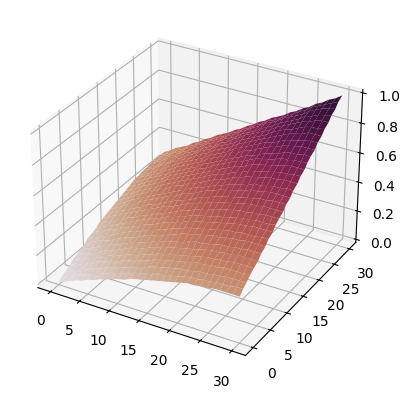

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, z, cmap='twilight_shifted', vmin=-1, vmax=1, alpha=1)

plt.show()

This functionality has been built into the **ContingencySpace** class, and can be called by simply using ContingencySpace.visualize():

In [7]:
from utils import ContingencySpace, ConfusionMatrix
from metrics import tau

cs = ContingencySpace([ConfusionMatrix({'t': [400, 100],
                                        'f': [12800, 3200]}),
                       ConfusionMatrix({'t': [200, 300],
                                        'f': [3200, 12800]}),
                       ConfusionMatrix({'t': [0, 500],
                                        'f': [16000, 0]})])

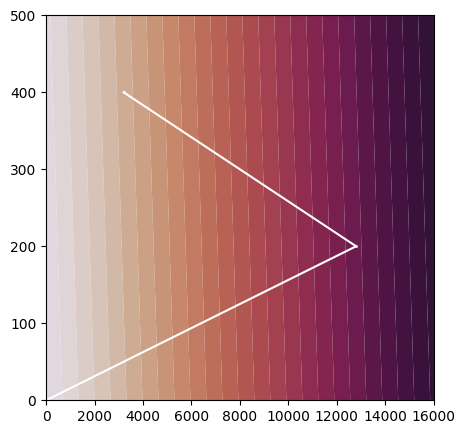

In [8]:
from metrics import accuracy, precision, recall, f1, hss, tss


cs.visualize(metric=accuracy, step_size=30, projection='2d')

In [11]:
from utils import ContingencySpace, ConfusionMatrix
from metrics import tau

cs = ContingencySpace([ConfusionMatrix({'t': [400, 100],
                                        'f': [400, 1600]}),
                       ConfusionMatrix({'t': [200, 300],
                                        'f': [800, 1200]}),
                       ConfusionMatrix({'t': [0, 500],
                                        'f': [2000, 0]})])